In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn 

%matplotlib inline

In [9]:
train_data = pd.read_csv("./data/train.csv", header=False, sep=",")
new_data = pd.read_csv("./data/train.csv", header=False, sep=",")

In [10]:
from gini import gini
from gini import gini_normalized

In [15]:
feat_predictors = [i for i in train_data.columns if "T1" in i]
train_id, train_y, train_x = train_data["Id"], train_data["Hazard"], train_data[feat_predictors]

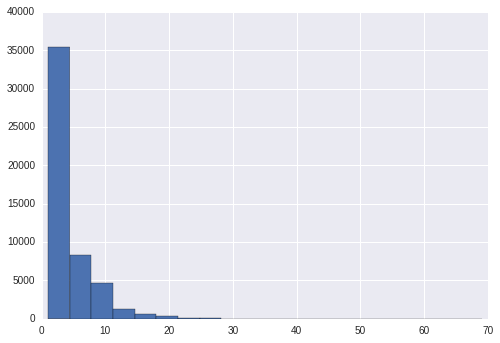

In [23]:
_ = plt.hist(train_y, bins=20)

def bins(x):
    if x <= 2:
        res = 0
    elif x <=5:
        res = 1
    elif x > 5:
        res = 2
    return res

biny = train_y.apply(bins)

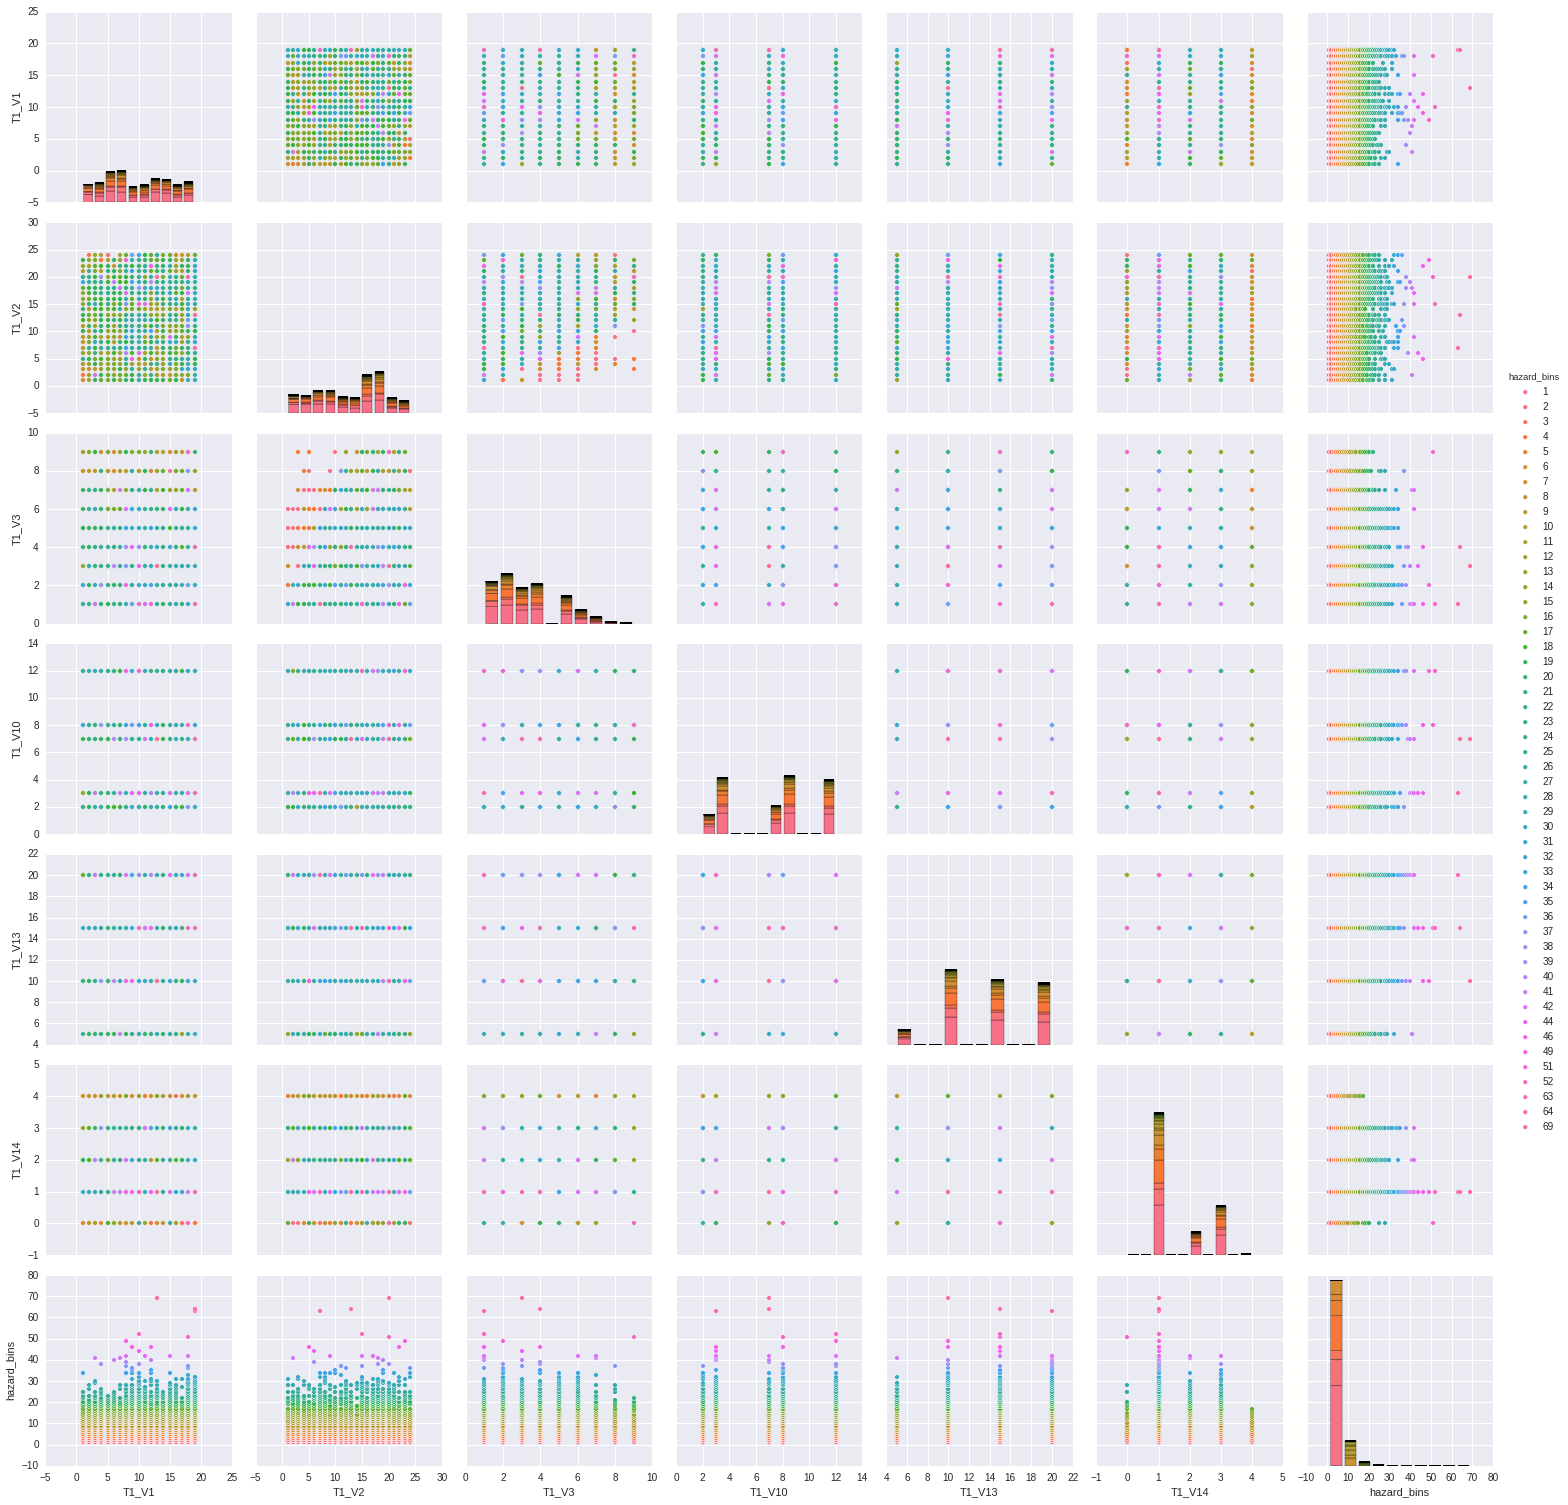

In [36]:
import seaborn as sns

data4vis = train_x.copy()
data4vis["hazard_bins"] = train_y
sns.set()
sns.pairplot(data4vis, hue="hazard_bins")

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
    
feat_char = ["T1_V4", "T1_V5", "T1_V6", "T1_V7", "T1_V8", 
             "T1_V9", "T1_V11", "T1_V12", "T1_V15", "T1_V16", "T1_V17"]

# enc = OneHotEncoder()
# enc.fit(train_data["T1_V4"])
dev_data = train_data.ix[:10, feat_char]
res = pd.get_dummies(dev_data["T1_V4"])
new_columns = ["T1_V4_" + i for i in res.columns]
print dev_data.columns
dev_data.drop("T1_V4", axis=1, inplace=True)
dev_data[new_columns] = res
dev_data.head(5)

def oneHotEncoder(data, columns):
    
    """ OneHotEncoder to tranform categorical data
    """
    for col in columns:
        transformed = pd.get_dummies(data[:, col])
        new_columns = [col + i for i in transformed.columns]
        data.drop(col, axis=1, inplace=True)
        data[new_columns] = transformed

    return data

# dev_data = oneHotEncoder(dev_data, feat_char)
# dev_data.head(5)
# transformed = pd.get_dummies(dev_data["T1_V4"])
# dev_data["T1_V4"]
dev_data["T1_V4"]

Index([u'T1_V4', u'T1_V5', u'T1_V6', u'T1_V7', u'T1_V8', u'T1_V9', u'T1_V11',
       u'T1_V12', u'T1_V15', u'T1_V16', u'T1_V17'],
      dtype='object')


KeyError: 'T1_V4'

In [40]:
import numpy as np
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
indices = np.arange(train_y.shape[0])
np.random.shuffle(indices)
X, y = train_x.ix[indices, :], train_y.ix[indices]

In [41]:
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",
                                              np.logspace(-7, 3, 3))

ValueError: could not convert string to float: N